In [1]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 맑은 고딕 적용
matplotlib.rc("font", family="NanumGothic")
# 음수 표지
matplotlib.rc("axes", unicode_minus=False)



In [2]:
import pandas as pd
from scipy import stats

In [3]:
df = pd.read_csv('/home/piai/바탕화면/파이썬_기초/빅데이터프로젝트/csv파일/텔레마케팅_파생변수.csv')

In [4]:
# 세로로 쌓이는 stack_bar
def stack_bar(var): 
    cross_tab_prop = pd.crosstab(index=df[var],
                             columns=df['계약여부'],
                             normalize="index")

    cross_tab = pd.crosstab(index=df[var],
                        columns=df['계약여부'])

    
    cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

    plt.legend(loc="upper center", ncol=2)
    plt.xlabel(var)
    plt.ylabel("Proportion")
    
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):

            plt.text(x=n - 0.17,
                     y=y_loc,
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=12,
                     fontweight="bold")

    plt.show()

In [5]:
#가로로 이어지는 stack_bar 

def stack_bar(var):
    cross_tab_prop = pd.crosstab(index=df[var],
                             columns=df['계약여부'],
                             normalize="index")

    cross_tab = pd.crosstab(index=df[var],
                        columns=df['계약여부'])

    

    
    cross_tab_prop.plot(kind='barh', 
                            stacked=True, 
                            colormap='tab10', 
                            figsize=(10, 6))

    plt.legend(loc="lower left", ncol=2)
    plt.ylabel(var)
    plt.xlabel("Proportion")


    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):

            plt.text(y=n - 0.03,
                     x=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=15,
                     fontweight="bold")

    plt.show()


In [6]:
# df 데이터에 column명 col을 넣으면 column 별로 yes/no라고 대답한 비율이 나옴 
def prop(df,col):

    tmp = df.groupby([col], as_index = False)['계약여부'].value_counts().rename(columns = {'count':'총합'})
    count =tmp.groupby([col], as_index = False)['총합'].agg('sum').rename(columns = {'총합':col +'별총합'})
    tmp = tmp.merge(count,on = col, how = 'left')
    tmp['비율'] = tmp['총합']/tmp[col +'별총합']
    return tmp

In [7]:
def stack_bar(var): # 세로로 쌓이는 stack_bar 사용 
    cross_tab_prop = pd.crosstab(index=df[var],
                             columns=df['계약여부'],
                             normalize="index")

    cross_tab = pd.crosstab(index=df[var],
                        columns=df['계약여부'])

    
    cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=cmap, 
                    figsize=(10, 6))

    plt.legend(loc="lower center", ncol=2)
    plt.xlabel(var)
    plt.ylabel("Proportion")
    
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                       cross_tab_prop.loc[x].cumsum()):

            plt.text(x=n - 0.17,
                     y=y_loc,
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=12,
                     fontweight="bold")

    plt.show()
    


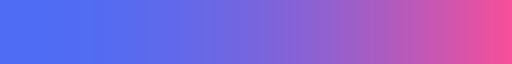

In [8]:
# stack_bar 색상변환 
from matplotlib.colors import LinearSegmentedColormap
# colors = ['#ff0000','#0227cc','#B472CC','#A468BA','#7E508F']
colors = ['#4e6df5','#f74f98']
cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=2)
cmap   
 

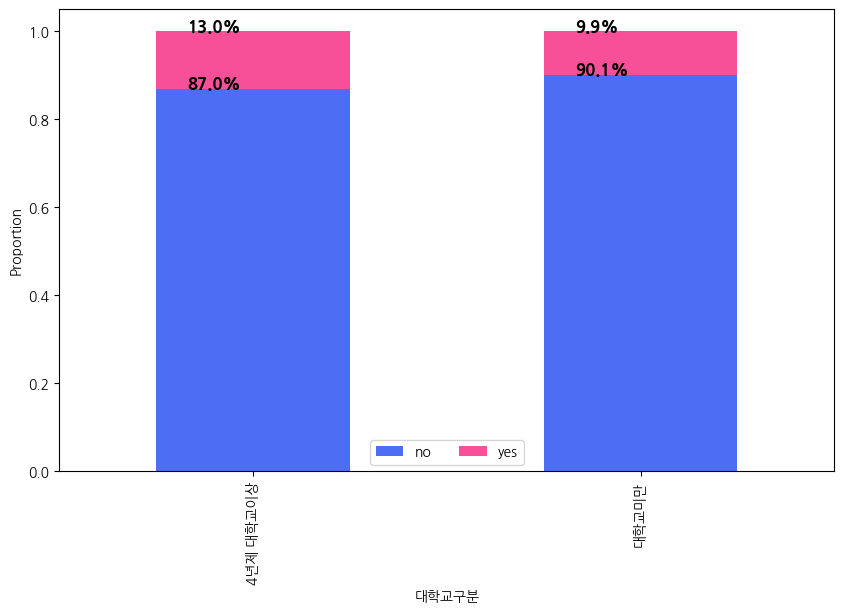

In [9]:
stack_bar("대학교구분")        


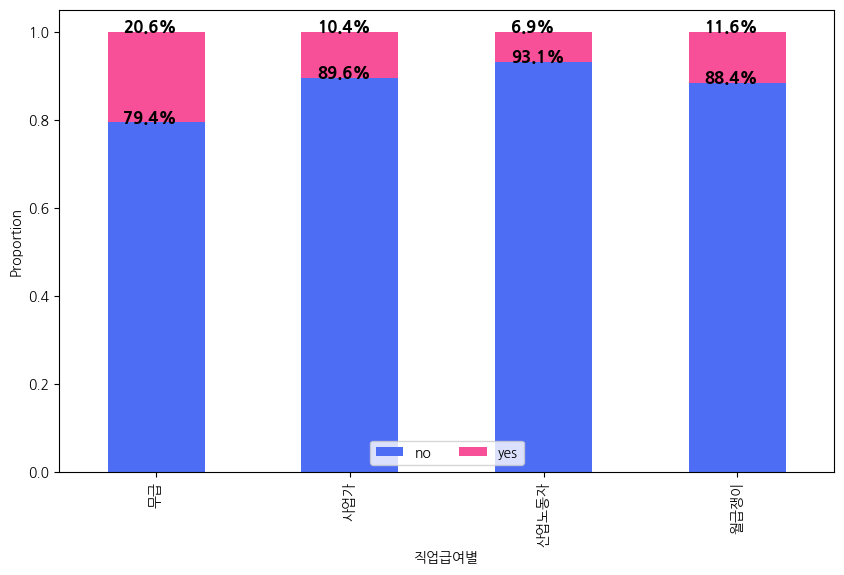

In [10]:
stack_bar("직업급여별")        


In [11]:
## 계약여부        
        
tmp = prop(df,'계약여부')
tmp    
        
contract = df.groupby(['계약여부'], as_index = False)['계약여부'].value_counts()
# sns.barplot(contract['계약여부'], contract['count'], hue = contract['계약여부'])
# plt.show()

# 연령대 

In [13]:
tmp

,계약여부,총합,계약여부별총합,비율
0,no,36548,36548,1.0
1,yes,4640,4640,1.0


연령대의 비율 그림: 



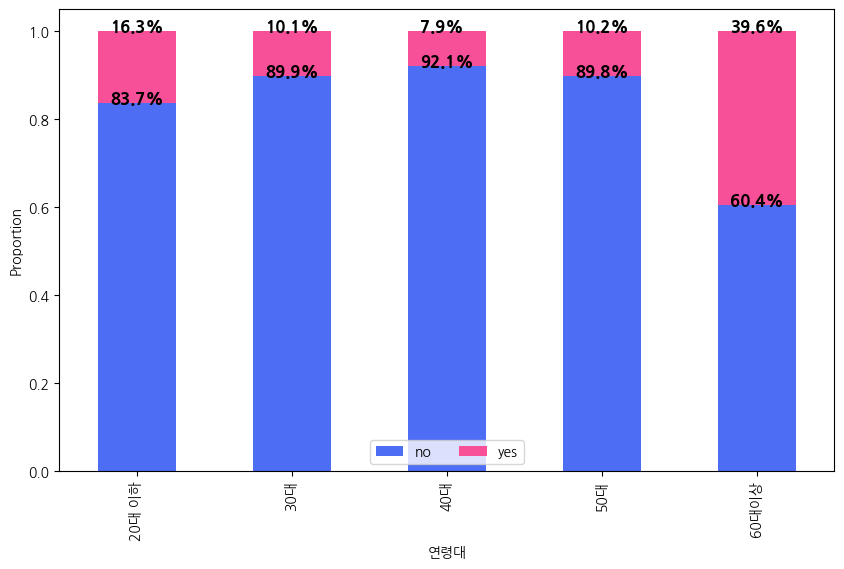

In [14]:
col = '연령대'
tmp = prop(df,col)
print(col+'의 비율 그림: \n')
#sns.barplot(tmp[col], tmp['비율'], hue = tmp['계약여부'])

stack_bar(col) 
# 20대이하, 60대이상의 연령대에서 계약여부 yes라고 대답한 비율이 다른 연령대에 비해 높게 나타났다.
# 그러면 우리는 30,40,50대를 타겟팅 해서 아웃바운드 성공률 높인다 or  20대이하, 60대이상의 선호도를 조사해 고객확보를 늘린다.
# 연령대는 유의미해 보인다.



# 결혼여부 

결혼여부의 비율 그림: 



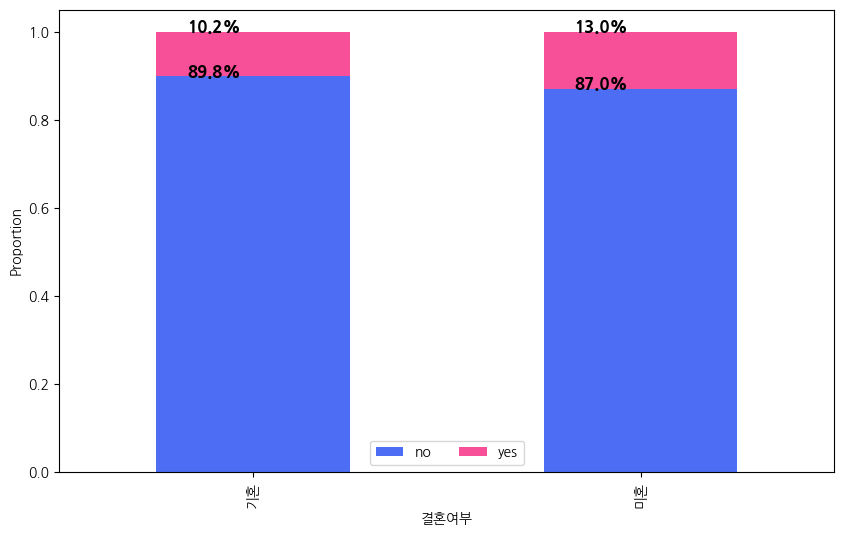

In [15]:
col = '결혼여부'
tmp = prop(df,col)
print(col+'의 비율 그림: \n')

stack_bar("결혼여부") 
# sns.barplot(tmp[col], tmp['비율'], hue = tmp['계약여부'])

# 미혼과 이혼을 합쳐 그래프를 나타내었는데 유의미하지 않다.